데이터출처: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [100]:
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


### 컬럼 살펴보기

1. Education: 학력 수준
2. JoiningTear: 입사 년도
3. City: 지사 위치
4. PaymentTier: 연봉 수준(1 ~5)
5. Age: 나이
6. Gender: 성별
7. EverBenched: 임시직무(?) 여부
8. Experience in Current Domain: 경력년수
9. LeaveOrNot: 회사 퇴사 여부

1. 데이터 타입 살펴보기

In [101]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

2. 결측값 확인

In [102]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

3. 상관관계 확인

/var/folders/_r/kxkkxvgj5yv38f_spv647jxc0000gn/T/ipykernel_1302/1316065374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


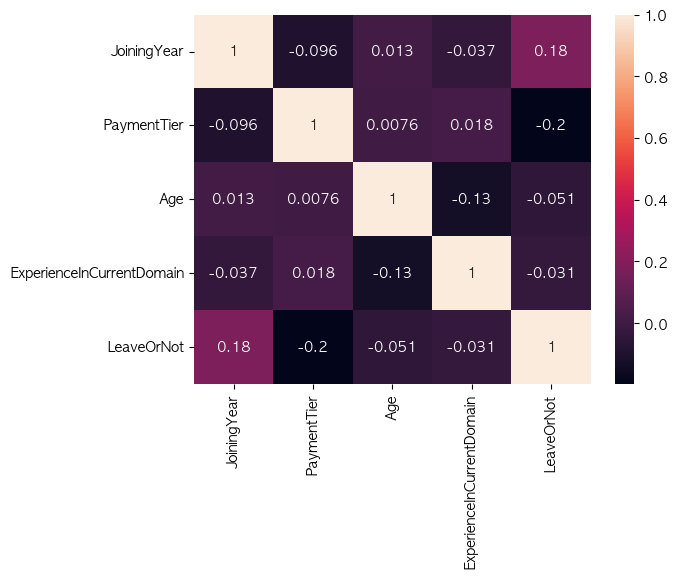

In [103]:
corr_df = df.corr()
sns.heatmap(corr_df, annot=True)
plt.show()

### EDA

1. JoiningYear

<Axes: xlabel='JoiningYear', ylabel='count'>

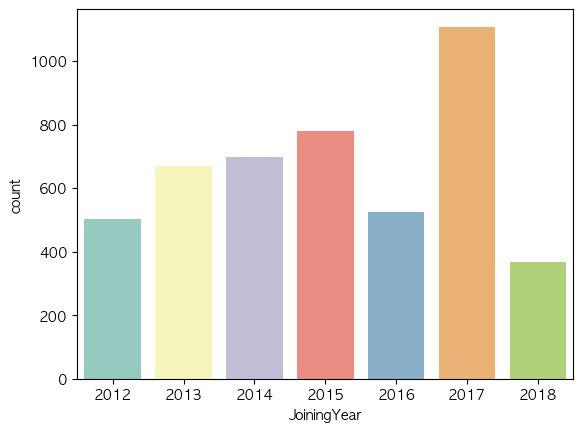

In [104]:
# 입사년도 countplot
sns.countplot(data=df, x='JoiningYear', palette='Set3')

<Axes: xlabel='JoiningYear'>

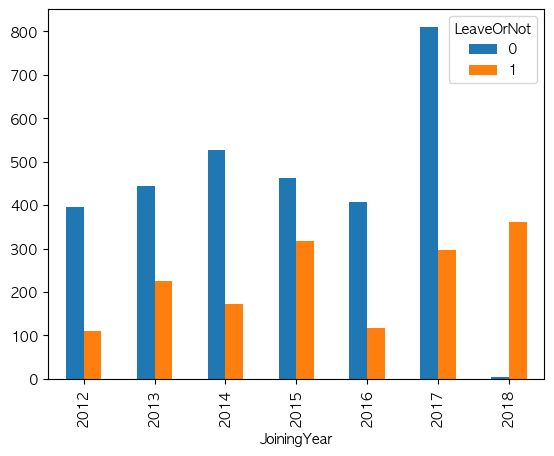

In [105]:
# 입사년도와 퇴사여부 Plot
count_leave = df.groupby(['JoiningYear', 'LeaveOrNot'])['LeaveOrNot'].count().unstack()
count_leave.plot(kind='bar')

2. Education

<Axes: xlabel='Education', ylabel='count'>

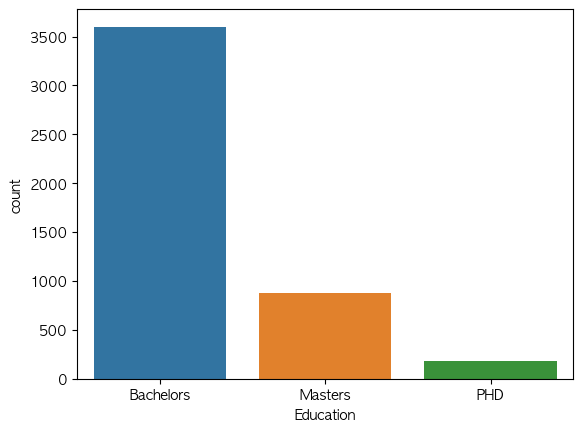

In [106]:
sns.countplot(data=df, x='Education')

<Axes: xlabel='Education'>

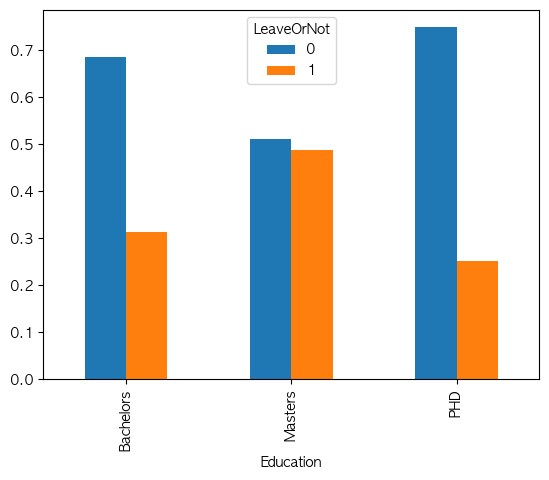

In [107]:
edu_leave = df.groupby(['Education', 'LeaveOrNot'])['LeaveOrNot'].count()

# 전체 빈도로 나누어 비율을 계산
ratio = (edu_leave / edu_leave.groupby('Education').transform('sum')).unstack()

# 결과 출력
ratio.plot(kind='bar')

3. Age

<Axes: xlabel='Age', ylabel='Density'>

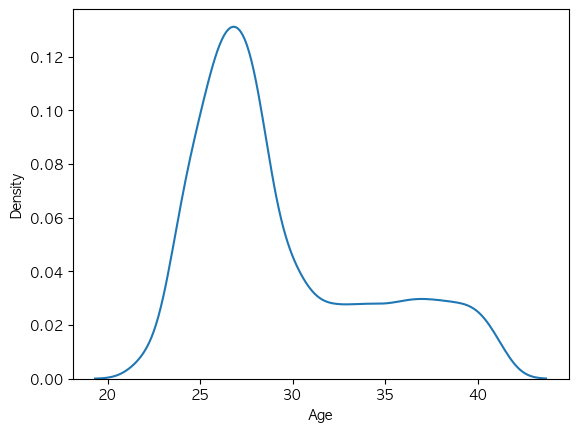

In [108]:
sns.kdeplot(x='Age', data=df)

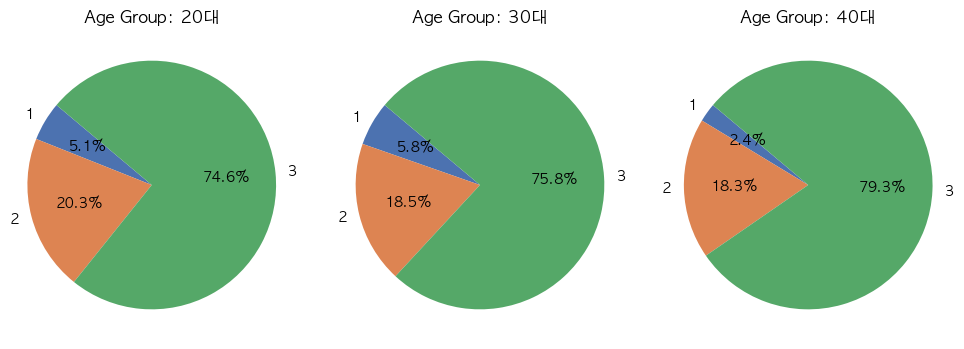

In [135]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50], labels=['20대', '30대', '40대'])
df_age_group_count = df.groupby('AgeGroup')['PaymentTier'].value_counts().unstack()
df_age_group_percentage = df_age_group_count.div(df_age_group_count.sum(axis=1), axis=0)

colors = sns.color_palette('deep', len(df_age_group_percentage.columns))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, age_group in enumerate(df_age_group_percentage.index):
    ax = axes[i]
    ax.pie(df_age_group_percentage.loc[age_group], labels=df_age_group_percentage.columns, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(f'Age Group: {age_group}')
    ax.axis('equal')

plt.show()

- 입사년도는 2017년도가 가장 많으며 퇴사여부와 입사년도의 상관관계는 뚜렷하다고 할수는 없지만 2018년도에 압도적으로 높은 것을 알 수 있다.
- 학력수준은 학사, 석사, 박사 순으로 많음을 알 수 있으며 석사의 퇴사율이 가장 높은 것을 알 수 있다.
- 나이는 25-30에 가장 많이 분포하고 있으며 연봉 수준은 연령별대로 비슷함을 알 수 있다.